# 건강검진 데이터로 가설검정하기

## 목차
0. 가설 세우기
1. 라이브러리 로드하고 한글폰트 설정하기
2. 데이터셋 소개와 로드하기 - 가설세우기
3. 로드한 데이터의 결측치를 보고 요약, 집계하기 - info, is null, value_counts
4. groupBy와 pivot_table로 다양한 집계 연산하기

---


## 0. 가설 세우기
- 음주 여부에 따라 건강검진 수치 차이가 있을까?

## 1. 라이브러리 로드하고 한글폰트 설정하기

- 데이터 분석을 위한 라이브러리를 로드하는 방법을 알아본다.
- 한글 폰트를 설정하는 방법을 알아본다.

### 1-1. 라이브러리 로드

In [88]:
# 라이브러리 로드
# pandas는 분석, numpy는 수치계산, seaborn은 matplotlib을 사용하기 쉽게 만든 시각화 라이브러리
# matplotlib은 그래프의 폰트 바꾸기, 스타일 변경, 사이즈 조정, 서브 플롯 사용을 위해 로드하는 라이브러리
# 구 버전의 주피터노트북에서는 %matplotlib inline 설정을 해야 노트북 안에서 그래프를 시각화할 수 있다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

### 1-2. 한글 폰트 설정

In [89]:
# 구글 코랩 사용 시 아래 코드를 실행, 폰트 설정을 한다.
# 로컬 아나콘다 사용 시에는 주석처리 해두기

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

# colab의 한글 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

AttributeError: module 'matplotlib.font_manager' has no attribute '_rebuild'

fm._rebuild() 때문에 오류가 발생하여 해당 코드 제외하고 다시 실행함.  
fm._rebuild()는 더 이상 필요하지 않은 메서드이므로!

In [90]:
# 구글 코랩 사용 시 아래 코드를 실행, 폰트 설정을 한다.
# 로컬 아나콘다 사용 시에는 주석처리 해두기

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null

import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# colab의 한글 폰트 설정
plt.rc('font', family='NanumGothic')
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [ ]:
# # 로컬 주피터 노트북 사용 시 아래 코드를 실행, 폰트 설정을 한다.
# # 운영체제별 설정을 위해 로드한다.
# import os

# # 맥, 윈도우인 경우를 각각 if, else문에 넣고 설정하기
# if os.name == 'posix' :  # 내 os 이름 넣기. os 이름 확인 방법은 아래 셀 참고
#     plt.rc("font", family="AppleGothic")
# else :
#     plt.rc("font", family="Malgun Gothic")

# # 마이너스 폰트 깨지는 문제에 대한 대처
# plt.rc("axes", unicode_minus=False)

In [91]:
# 내 os 이름 확인은 아래와 같이 가능하다.

os.name

'posix'

In [92]:
# 레티나 설정으로 글씨를 선명하게 하기
# 폰트의 주변이 흐릿하게 보이는 것을 방지함.

%config InlineBackend.figure_format = 'retina'

- 한글 폰트를 설정하는 다른 방법

In [93]:
# # 한글폰트 사용을 위해 설치
# # 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

# import koreanize_matplotlib

---

## 2. 데이터셋 소개와 로드하기 - 가설세우기
데이터셋을 로드하고, 데이터셋의 기본 정보들을 확인해보기  

- 공공데이터 포털 > 건강검진정보(2017) 데이터를 활용
    - 2018 데이터는 utf-8 인코딩, 2017 데이터는 한글 인코딩이 되어 있음
    - 아래 링크 내 주기성 과거 데이터 목록에서 확인 가능
    - [링크](https://www.data.go.kr/data/15007122/fileData.do)
- 국민건강보험 홈페이지 > 공공데이터 개방서비스 에서도 데이터 다운로드 가능
    - [링크](https://nhiss.nhis.or.kr/op/it/index.do)

In [99]:
# 현재 경로 확인하기
os.getcwd()

'/content'

In [100]:
# 작업 디렉토리 변경하기
os.chdir("drive/MyDrive/AI/naver_coaching_study_2024/week03")

In [101]:
os.getcwd()

'/content/drive/MyDrive/AI/naver_coaching_study_2024/week03'

In [102]:
# # 디렉토리의 모든 파일과 폴더를 나열하기
# os.listdir('/디렉토리명')

In [104]:
# 데이터 읽어오기
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.CSV")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 1: invalid start byte

UnicodeDecodeError 가 발생하였다.  
utf-8 인코딩이 되어 있는 파일을 불러올 때는 encoding 옵션을 사용한다. euc-kr 2350개 글자를 표현하고, cp949는 11124개 글자를 표현한다.  
한글 인코딩하여 다시 로드한다.

In [105]:
# 데이터 읽어오기
df = pd.read_csv("data/NHIS_OPEN_GJ_2017.CSV", encoding="cp949")
df

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [106]:
# 데이터셋 크기 확인
df.shape

(1000000, 34)

In [107]:
# 데이터 미리보기 head
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [108]:
# 데이터 미리보기 tail
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [109]:
# 데이터 미리보기 sample
df.sample(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
838303,2017,838304,2,9,41,160.0,55.0,64.0,0.9,1.0,...,14.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
639937,2017,639938,2,13,42,155.0,60.0,78.0,0.8,0.7,...,59.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
547944,2017,547945,1,11,48,165.0,65.0,80.0,1.0,0.9,...,29.0,2.0,1.0,1,NaN,NaN,NaN,NaN,0.0,20181126


- 공식문서 도움말 보는 법  
예를 들어 df.head에 대한 도움말을 보려면
    - df.head 하고 shift+tab : 라이브러리의 옵션 확인
    - df.head? 코드를 실행 : 자세한 설명 보기

In [110]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

같은 shape의 데이터셋이더라도 용량은 다를 수 있다.  
    -> 데이터 타입, 결측치, 어떤 문자가 들어가는지, 문자의 길이 등에 따라 달라짐!  

- 메모리가 부족하다면 아래와 같이 해결할 수 있다.
    - int를 float으로 변경하여 메모리 줄이기
    - 결측치 줄여서 메모리 줄이기
    - 불필요한 브라우저창 닫기

In [111]:
# 데이터셋의 컬럼만 확인
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [112]:
# 데이터 타입만 확인
df.dtypes

,0
기준년도,int64
가입자일련번호,int64
성별코드,int64
연령대코드(5세단위),int64
시도코드,int64
신장(5Cm단위),float64
체중(5Kg 단위),float64
허리둘레,float64
시력(좌),float64
시력(우),float64


---

## 3. 로드한 데이터의 결측치를 보고 요약, 집계하기 - info, is null, value_counts
### 3-1. 결측치 보기

In [113]:
# 결측치 보기
# 결측치는 True, 결측치가 아닌 것은 False로 표기된다.

df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [114]:
# 컬럼마다의 결측치 개수 확인하기
df.isnull().sum()

,0
기준년도,0
가입자일련번호,0
성별코드,0
연령대코드(5세단위),0
시도코드,0
신장(5Cm단위),262
체중(5Kg 단위),268
허리둘레,440
시력(좌),288
시력(우),279


-> 치아 관련된 컬럼에서 많은 결측치가 있음을 확인할 수 있다.

In [115]:
# 결측치 확인하기 : isna()
df.isna()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [116]:
# 컬럼 별 결측치 수 확인 : isna()
df.isna().sum()

,0
기준년도,0
가입자일련번호,0
성별코드,0
연령대코드(5세단위),0
시도코드,0
신장(5Cm단위),262
체중(5Kg 단위),268
허리둘레,440
시력(좌),288
시력(우),279


<Axes: >

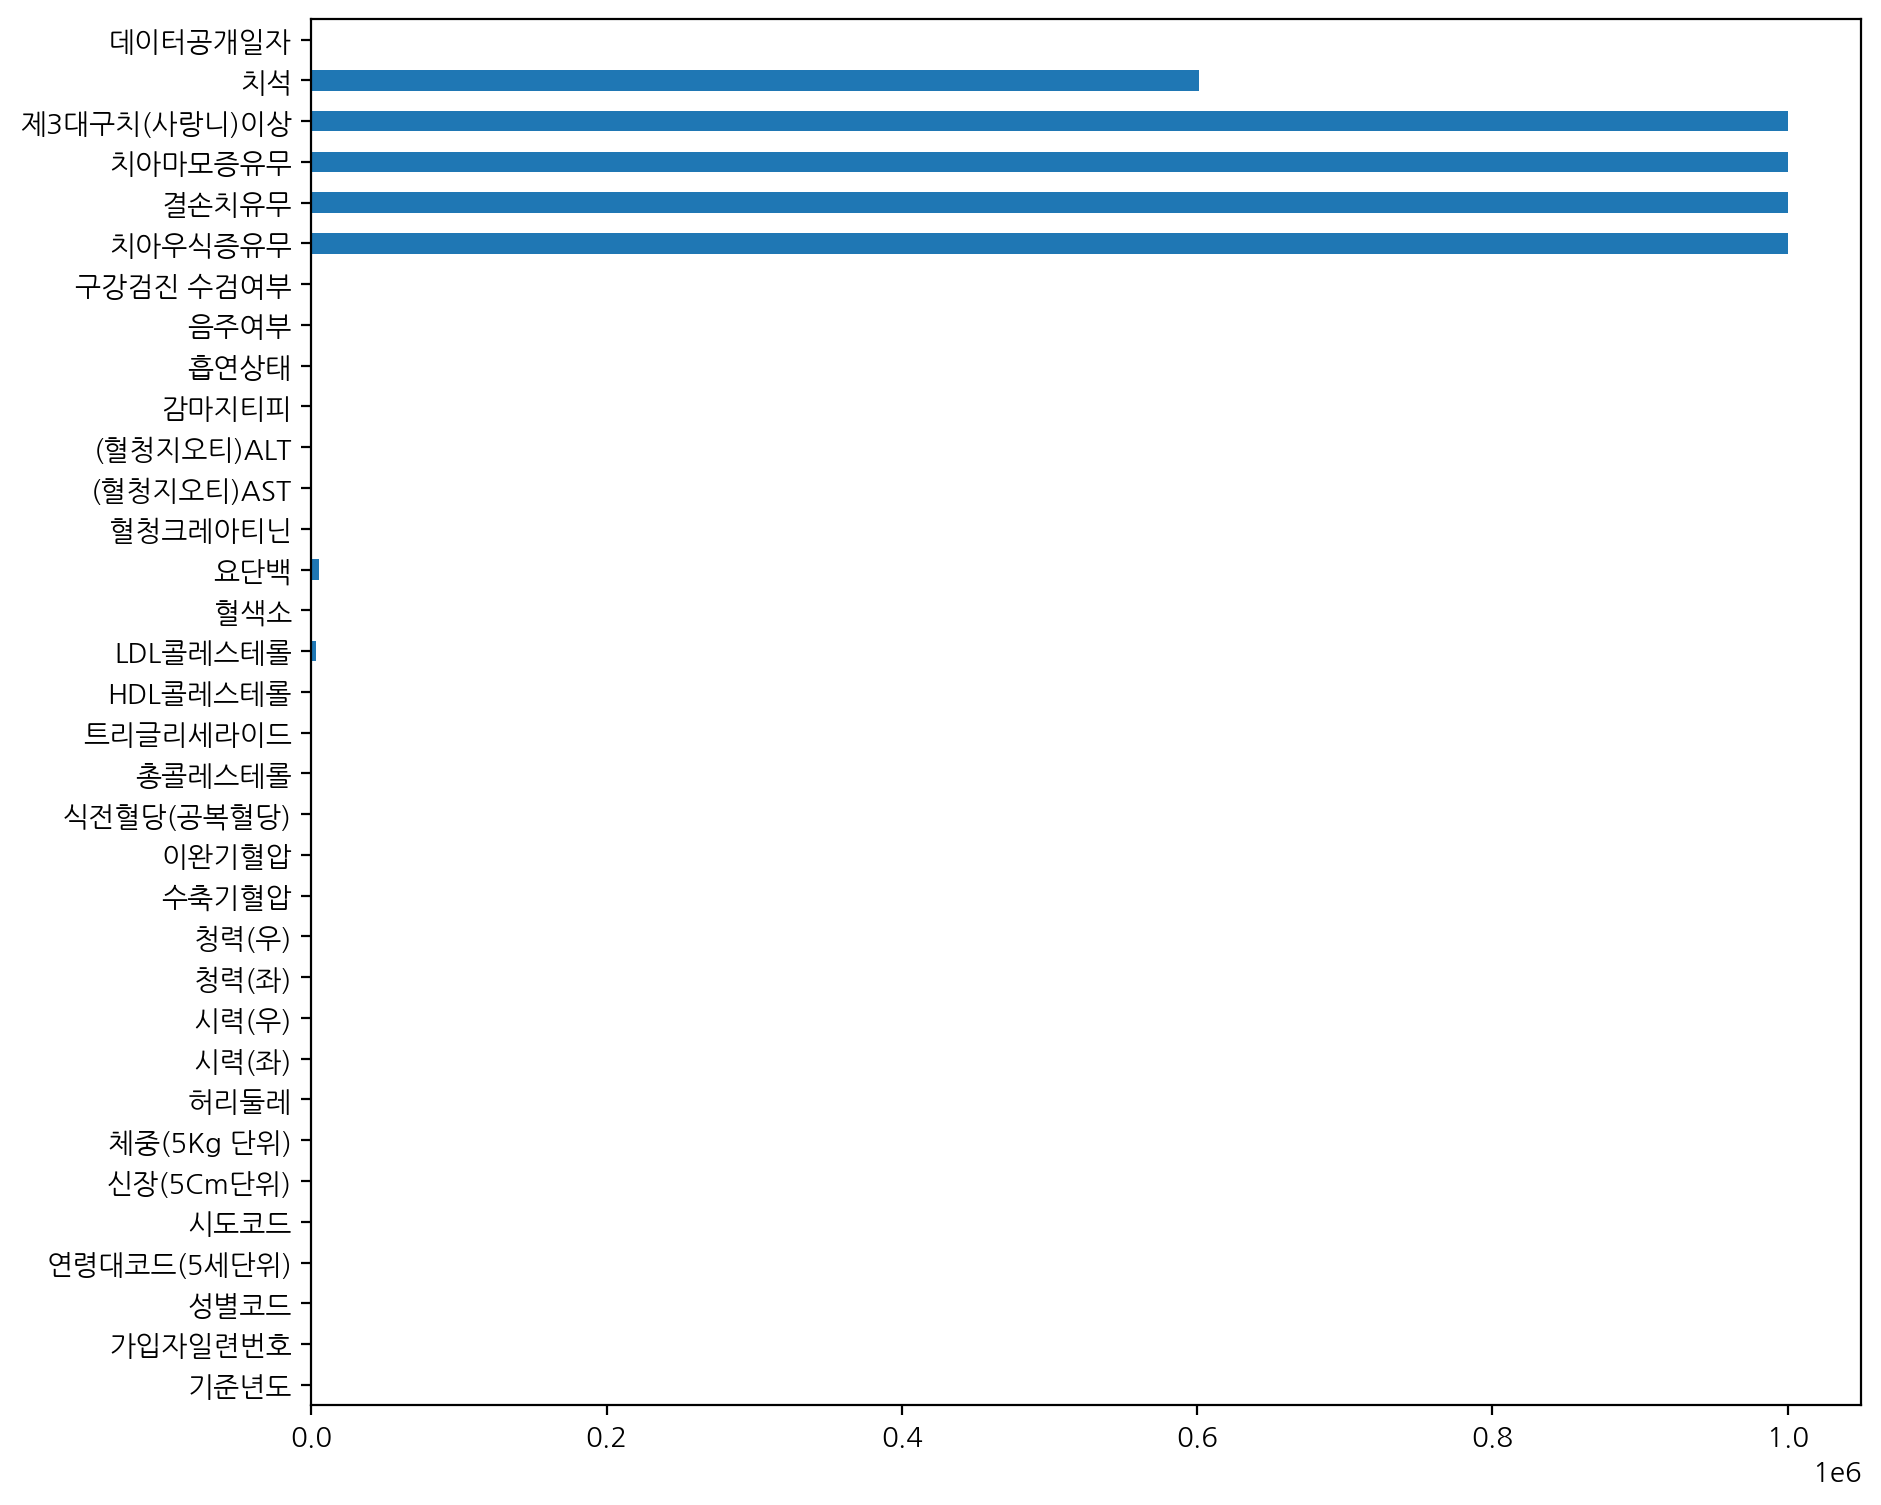

In [117]:
# 결측치 시각화 하기
df.isnull().sum().plot.barh(figsize=(10, 9))

<Axes: >

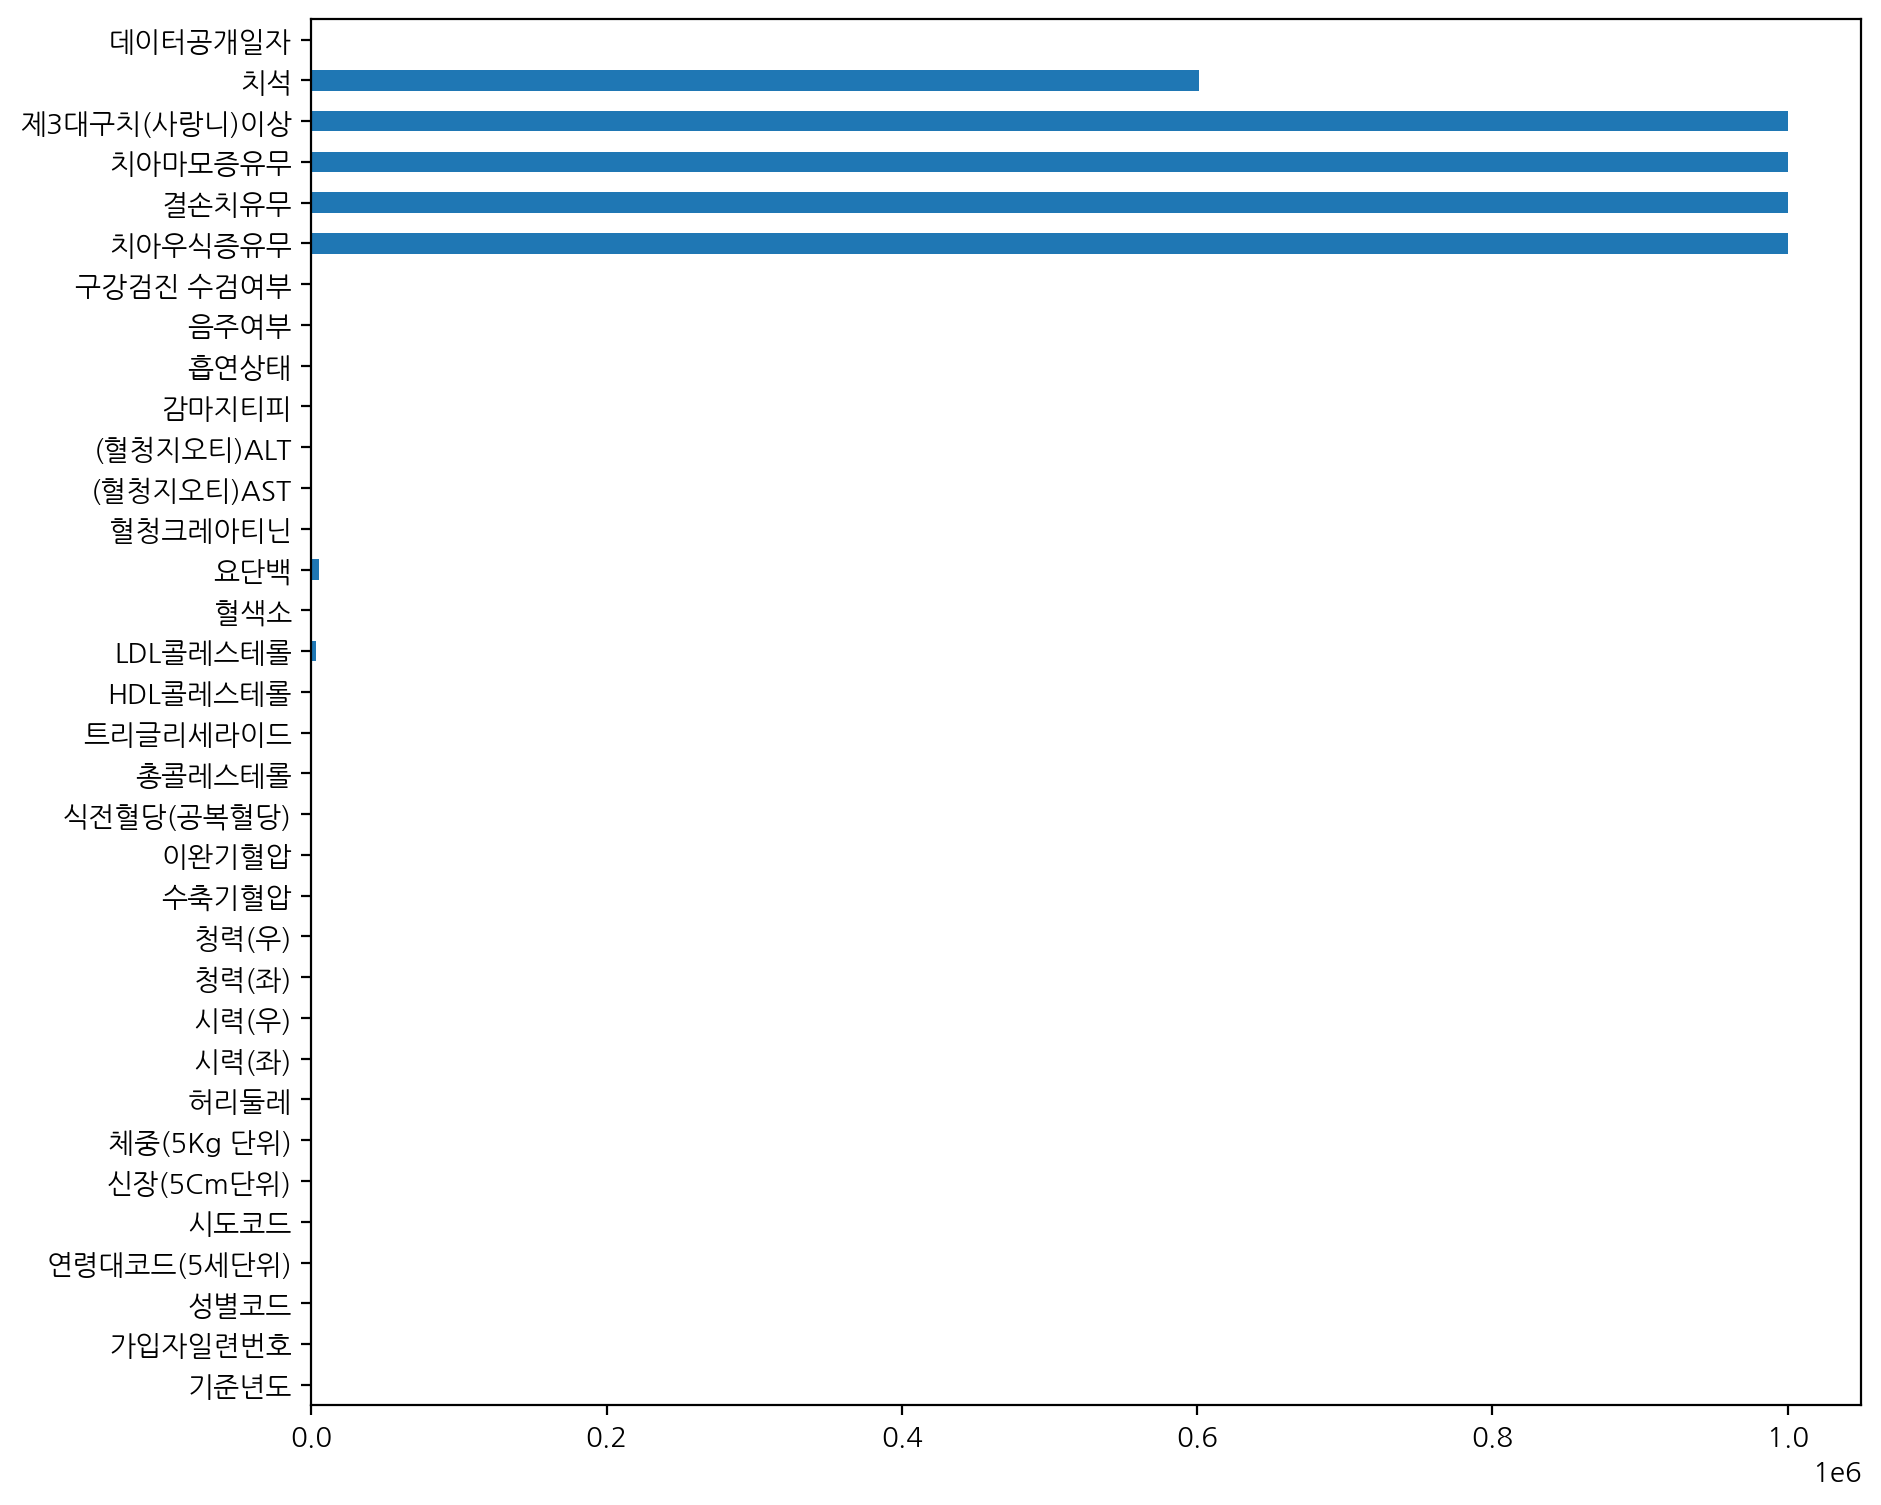

In [118]:
# 결측치 시각화 하기
df.isnull().sum().plot.barh(figsize=(10, 9))

### 3-2. 일부 데이터 가져와서 요약 및 집계하기

In [119]:
# 일부 데이터 가져오기 : "(혈청지오티)ALT"
df["(혈청지오티)ALT"]

,(혈청지오티)ALT
0,41.0
1,13.0
2,62.0
3,24.0
4,62.0
...,...
999995,11.0
999996,11.0
999997,13.0
999998,30.0


In [120]:
# 2개 이상의 컬럼 데이터 가져오기
df[["(혈청지오티)ALT","(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


- 1개의 컬럼값을 가져올 때는 df["컬럼명"]으로 작성한다.
    - series 형태로 불러와진다.
- 2개 이상의 컬럼값을 가져올 땐 df[["컬럼명"]] 리스트로 한 번 더 감싸줘야 한다.
    - 2개 이상의 컬럼값은 데이터프레임 형태로 가져와야 하며,
    - 데이터프레임 형태로 가져오려면 df[["컬럼명"]] 으로 작성해야 한다.


In [121]:
# "(혈청지오티)ALT","(혈청지오티)AST" 요약하기
df[["(혈청지오티)ALT","(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [122]:
# describe로 요약해보기
df[["(혈청지오티)ALT","(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


-> 75분위수가 각각 30, 28인데 max값이 각각 6710, 9999로 굉장히 큰 값(이상치)이 있는 것으로 보아 평균값은 max값에 의해 편향되어 있음을 알 수 있다.

#### value_counts로 값 집계하기

In [123]:
# value_counts로 성별코드를 그룹화하고 개수 집계하기
df["성별코드"].value_counts()

,count
성별코드,
1,531172
2,468828


1 : 남자, 2 : 여자

In [124]:
# value_counts로 흡연상태로 그룹화하고 개수 집계하기
df["흡연상태"].value_counts()

,count
흡연상태,
1.0,608587
3.0,215061
2.0,176192


-> 공공데이터 포털에서 흡연상태 1.0, 2.0, 3.0이 각각 어떤 것을 지칭하는지 확인 가능하다.  
공공데이터 포털 > 국민건강정보데이터 건강검진정보 사용자 매뉴얼_20171027.pdf 파일
- 1 : 피우지 않는다
- 2 : 이전에 피웠으나 끊었다
- 3 : 현재도 피우고 있다

---

## 4. groupBy와 pivot_table로 다양한 집계 연산하기
groupBy와 pivot_table은 2개 이상의 데이터를 보기 위해 사용한다.  
(1개 컬럼의 데이터, 즉 series는 value_counts로 본다.)

### 4-1. groupby

In [125]:
# groupby로 데이터 그룹화하기 : 원하는 컬럼(성별코드) 기준으로 각 컬럼들의 평균값 구하기
df.groupby(["성별코드"]).mean()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,2017.0,499946.580386,10.324381,34.15184,168.516441,70.211016,85.171843,1.035268,1.034448,1.032813,...,49.446249,2.058548,0.670136,0.433298,NaN,NaN,NaN,NaN,0.640683,20181126.0
2,2017.0,500061.589758,10.783424,33.25853,155.078899,55.701656,77.061441,0.915023,0.910340,1.031968,...,23.396111,1.094082,0.300790,0.359603,NaN,NaN,NaN,NaN,0.549563,20181126.0


In [126]:
# groupby로 데이터 그룹화하기 : 원하는 컬럼(성별코드) 기준으로 각 컬럼들의 데이터 개수 구하기
df.groupby(["성별코드"]).count()

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,531172,531172,531172,531172,531098,531098,531102,531047,531055,531064,...,531154,531120,530976,531172,0,0,0,0,230156,531172
2,468828,468828,468828,468828,468640,468634,468458,468665,468666,468694,...,468801,468720,468499,468828,0,0,0,0,168592,468828


In [127]:
# 성별코드로 그룹화하여 가입자일련번호의 데이터 개수 세기
df.groupby(["성별코드"])["가입자일련번호"].count()

,가입자일련번호
성별코드,
1,531172
2,468828


#### groupby와 value_counts의 차이점
- groupby는 count()뿐만 아니라 다양한 값을 연산해볼 수 있는 반면, value_counts는 개수 세기만 가능하다.
- groupby는 여러 개의 컬럼들을 한 번에 볼 수 있다. (value_counts는 불가능)
    - groupby는 컬럼명에 [ ]를 씌워줘야 한다.

In [128]:
# 성별코드와 음주여부로 그룹화를 하고, 개수 세어보기
# 음주여부 0 : 음주하고 있지 않다. / 1 : 음주하고 있다.
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

-> 남성은 음주하고 있는 사람의 수가 많고, 여성은 음주를 하고 있지 않은 사람의 수가 많다.

In [129]:
# 성별코드와 음주여부로 그룹화를 하고, "감마지티피"의 평균 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

- 감마지티피는 간수치에 관련된 데이터이다.
- 남성과 여성 모두 음주하고 있는 사람들의 감마지티피 수치가 더 높다.

In [130]:
# 성별코드와 음주여부로 그룹화를 하고, "감마지티피"의 요약 수치 구하기
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

- 75분위 값에 비해 월등히 큰 max값이 999인 이유를 공공포털 홈페이지에서 찾아보기

In [131]:
# agg를 사용하여 원하는 값만 구하기 (여러개 가능)
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(
    ["count", "mean", "median"]
)

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

-> 중앙값에 비해 평균값이 편향되어 있을 것으로 예측 가능 (max값이 매우 커서)

### 4-2. pivot_table
- pivot : 연산을 하지 않고, 데이터의 형태만 바꿀 때 사용
- pivot_table : 연산도 하고, 데이터의 형태만 바꿀 때 사용
- groupby에 비해 pivot_table이 더 직관적으로 사용하기 좋으나, 속도는 더 느리다.

In [133]:
df.pivot

<bound method DataFrame.pivot of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
0         1.0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN   
1         1.2    1.0  ...   10.0   1.0   0.0          1      NaN    NaN   
2         1.0    0.8  ...  136.0   1.0   0.0          1      NaN    NaN   
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
4         1.5    1.5  ...   68.0   3.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN           NaN  1.0  20181126  
1           NaN           NaN  1.0  20181126  
2           NaN           NaN  0.0  20181126  
3           NaN           NaN  NaN  20181126  
4           NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[1000000 rows x 34 columns]>

-> 설명 맨 아래의 Examples을 보면 이해하기 쉽다.

In [136]:
df.pivot_table

<bound method DataFrame.pivot_table of         기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
0       2017        1     1           13    46      170.0        65.0  91.0   
1       2017        2     2            8    41      150.0        45.0  73.4   
2       2017        3     1            8    45      175.0        75.0  94.0   
3       2017        4     2           12    11      155.0        55.0  67.5   
4       2017        5     1            8    41      175.0        75.0  93.0   
...      ...      ...   ...          ...   ...        ...         ...   ...   
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
0         1.0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN   
1         1.2    1.0  ...   10.0   1.0   0.0          1      NaN    NaN   
2         1.0    0.8  ...  136.0   1.0   0.0          1      NaN    NaN   
3         0.9    1.0  ...   30.0   1.0   1.0          0      NaN    NaN   
4         1.5    1.5  ...   68.0   3.0   0.0          0      NaN    NaN   
...       ...    ...  ...    ...   ...   ...        ...      ...    ...   
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN           NaN  1.0  20181126  
1           NaN           NaN  1.0  20181126  
2           NaN           NaN  0.0  20181126  
3           NaN           NaN  NaN  20181126  
4           NaN           NaN  NaN  20181126  
...         ...           ...  ...       ...  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[1000000 rows x 34 columns]>

In [134]:
# "음주여부"에 따른 그룹화된 수(평균값) 구하기
df.pivot_table(index="음주여부")

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017.0,20181126.0,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017.0,20181126.0,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [142]:
# "음주여부"에 따른 가입자일련번호의 개수 구하기
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [137]:
# "음주여부"에 따른 감마지티피의 평균 구하기
df.pivot_table(index="음주여부", values="감마지티피", aggfunc="mean")

# aggfunc의 기본값이 평균값이라 별도로 지정하지 않아도 되지만 aggfunc='mean' 으로 지정해도 된다.

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


-> 음주하는 사람들의 감마지티피 수치가 높다.  
감마지티피는 간에 문제가 있을 때 높은 수치가 나타나므로, 음주는 간에 부정적인 영향을 미친다.

In [138]:
# aggfunc에 여러 개의 값 설정하기
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


- 데이터를 대표하는 값으로 median 값을 사용하기도 한다.

In [139]:
# aggfunc에 describe를 사용해 통계요약값 한 번에 보기
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [140]:
pd.pivot_table(df, index=["음주여부", "성별코드"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

## 느낀점
여러 컬럼들로 재구성하여 인사이트를 도출하는 것이 흥미롭다.  
엑셀로는 어려웠었는데 다양한 시도를 해볼 수 있을 것 같다!